In [1]:
!pip install requests-cache

In [2]:
!pip install ipywidgets

In [3]:
import requests
import requests_cache
import re
import pandas as pd
import time
import lxml.html as html
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import plotly.express as px
from collections import Counter

In [4]:
url = 'https://www.leagueofgraphs.com/rankings/summoners'

headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
                      '(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}

response = requests.get(url, headers=headers)


# Parse the response content using lxml
doc = html.fromstring(response.content)

# Use XPath to extract all href attributes of the specified links
links = doc.xpath("//div[contains(@class, 'dropdown regionFilterDropdown')]//a/@href")
    
base_url = "https://www.leagueofgraphs.com"
region_ranking_links = [base_url + link for link in links]

# Print all links
# for link in region_ranking_links:
#     print(link)
# region_ranking_links.pop(0) # pop the all region link
# region_ranking_links

all_players_name = []

for link in region_ranking_links:
    if link:
        ranking_response = requests.get(link, headers=headers)

        if ranking_response.status_code == 200:
            ranking_doc = html.fromstring(ranking_response.content)

            player_name = ranking_doc.xpath("//span[@class='name']/text()")
            all_players_name.append(player_name)
            
            
        else:
            print(f"Failed to retrieve rankings page, status code: {ranking_response.status_code}")
    else:
        print("Ranking page link not found on the main page")
all_player_list = all_players_name # This is the list of list for all players in game

all_players_href = []  # Initialize an empty list to store all player hrefs

for link in region_ranking_links:
    response = requests.get(link, headers=headers)
    doc = html.fromstring(response.content)
    players_href = doc.xpath("//td/a[contains(@href, '/summoner/')]/@href")


    all_players_href.extend(players_href)
    
real_list = []
for player in all_players_href:
    if player not in real_list:
        real_list.append(player)

base_url = "https://www.leagueofgraphs.com"
full_links = [base_url + player for player in real_list]

# Initialize an empty dictionary
player_links_dict = {}

# Iterate over the all_player_list and use each name as a key in the dictionary
for sublist in all_player_list:
    for player in sublist:
        player_links_dict[player] = None  # Set the value to None if you don't have any associated value

for key, link in zip(player_links_dict.keys(), full_links):
    # Assign each link from full_links to its corresponding key in the dictionary
    player_links_dict[key] = link

# len(player_links_dict)

df = pd.DataFrame(list(player_links_dict.items()), columns=['Player', 'Link'])

# Extract players from each regions
br_df = df[0:100]
eune_df = df[100:200]
euw_df = df[200:300]
jp_df = df[300:400]
kr_df = df[400:500]
lan_df = df[500:600]
las_df = df[600:700]
na_df = df[700:800]
oce_df = df[800:900]
ph_df = df[900:1000]
ru_df = df[1000:1100]
sg_df = df[1100:1200]
th_df = df[1200:1300]
tr_df = df[1300:1400]
tw_df = df[1400:1500]
vn_df = df[1500:1600]

each_region_champions = []
for region in region_ranking_links:
    url = region
    response = requests.get(url, headers=headers)
    doc = html.fromstring(response.content)
    # Use XPath to extract all href attributes of the specified link
    
    for i in range(1, 2):
        user_links = doc.xpath("//table[contains(@class, 'data_table summonerRankingsTable with_sortable_column')]//td[contains(@class, 'text-center')]//a[1]/img[@title]/@title")
        each_region_champions.append(user_links)

# each_region_champions

brazil_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in br_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    brazil_dict[player_name] = each_region_champions[0][i]
    i += 1

# Print the dictionary
# print(brazil_dict)

eune_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in eune_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    eune_dict[player_name] = each_region_champions[1][i]
    i += 1

# Print the dictionary
# print(eune_dict)

euw_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in euw_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    euw_dict[player_name] = each_region_champions[2][i]
    i += 1

# Print the dictionary
# print(euw_dict)

jp_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in jp_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    jp_dict[player_name] = each_region_champions[3][i]
    i += 1

# Print the dictionary
# print(jp_dict)

kr_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in kr_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    kr_dict[player_name] = each_region_champions[4][i]
    i += 1

# Print the dictionary
# print(kr_dict)

lan_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in lan_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    lan_dict[player_name] = each_region_champions[5][i]
    i += 1

# Print the dictionary
# print(lan_dict)

las_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in las_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    las_dict[player_name] = each_region_champions[6][i]
    i += 1

# Print the dictionary
# print(las_dict)

na_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in na_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    na_dict[player_name] = each_region_champions[7][i]
    i += 1

# Print the dictionary
# print(na_dict)

oce_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in oce_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    oce_dict[player_name] = each_region_champions[8][i]
    i += 1

# Print the dictionary
# print(oce_dict)

ph_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in ph_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    ph_dict[player_name] = each_region_champions[9][i]
    i += 1

# Print the dictionary
# print(ph_dict)

ru_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in ru_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    ru_dict[player_name] = each_region_champions[10][i]
    i += 1

# Print the dictionary
# print(ru_dict)

sg_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in sg_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    sg_dict[player_name] = each_region_champions[11][i]
    i += 1

# Print the dictionary
# print(sg_dict)

th_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in th_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    th_dict[player_name] = each_region_champions[12][i]
    i += 1

# Print the dictionary
# print(th_dict)

tr_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in tr_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    tr_dict[player_name] = each_region_champions[13][i]
    i += 1

# Print the dictionary
# print(tr_dict)

tw_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in tw_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    tw_dict[player_name] = each_region_champions[14][i]
    i += 1

# Print the dictionary
# print(tw_dict)

vn_dict = {}
i = 0
# Iterate through each row in the DataFrame
for index, row in vn_df.iterrows():
    # Get the player name from the "Player" column
    player_name = row['Player']
    # Add the player name as a key to the dictionary with the link as the value
    vn_dict[player_name] = each_region_champions[15][i]
    i += 1

# Print the dictionary
# print(vn_dict)

url = "https://gol.gg/esports/home/"

response = requests.get(url, headers=headers)
doc = html.fromstring(response.content)

lol_href = doc.xpath("//nav[contains(@class, 'navbar')]/div/ul/li//@href")

list_of_links_for_regions = lol_href[8:]
list_of_links_for_regions.pop(0) #we exclude LPL

#LEC EU
#LCK
#LCS NA
#CB Br
#VCS VN
#PCS Hongkong Taiwan SEA
#TCL turkey
#LJL Japan
#LLA Latin America (SOUTH america?)

list_of_links_for_regions = [link.replace('..', '') for link in list_of_links_for_regions]

# print(list_of_links_for_regions)

base_url = "https://gol.gg"

# Prepend the base URL to each link in the list
list_of_links_for_regions = [base_url + link for link in list_of_links_for_regions]

# print(list_of_links_for_regions)

leaderboard_link_list = []


for link in list_of_links_for_regions:
    url = link
    response = requests.get(url, headers=headers)
    doc = html.fromstring(response.content)
    
    links = doc.xpath("//a[contains(@class, 'nav-link')]/@href")
    leaderboard_link_list.append(links[-4])  


# leaderboard_link_list

base_url = "https://gol.gg/tournament"
leaderboard_link_list = [link.replace('.', '') for link in leaderboard_link_list]
# Prepend the base URL to each link in the list
leaderboard_link_list_formatted = [base_url + link for link in leaderboard_link_list]

# print(leaderboard_link_list_formatted)


# Initialize a dictionary to hold the top team for each league key
top_teams = {}

# Define a list of league acronyms in the specified order
league_keys = ['LEC', 'LCK', 'LCS', 'CB', 'VCS', 'PCS', 'TCL', 'LJL', 'LLA']

# Ensure your list of URLs is in the same order as the league_keys
# This is an assumption as I cannot see the entire list of URLs
for index, url in enumerate(leaderboard_link_list_formatted):
    response = requests.get(url, headers=headers)
    doc = html.fromstring(response.content)

    # Extract the top team. Adjust the XPath if necessary for the site structure.
    top_team = doc.xpath("//table[contains(@class, 'table_list')]/tbody/tr[1]/td[1]/a/text()")

    # Assign the top team to the corresponding league acronym
    if top_team:
        top_teams[league_keys[index]] = top_team[0]
    else:
        top_teams[league_keys[index]] = "Team not found"

# Now you have a dictionary with the league as the key and the top team as the value
# for key, value in top_teams.items():
#     print(f"{key}: {value}")


url = 'https://gol.gg/tournament/tournament-ranking/LEC Spring Season 2024/'

top1_team_in_region_link_list=[]
for url in leaderboard_link_list_formatted:

    response = requests.get(url, headers=headers)
    doc = html.fromstring(response.content)

    top1_href = doc.xpath("//table[contains(@class, 'table_list')]/tbody/tr[1]/td[1]/a/@href")
    top1_team_in_region_link_list.append(top1_href)

top1_team_in_region_link_list = ['https://gol.gg' + link[0].replace('..', '') for link in top1_team_in_region_link_list]
# print(top1_team_in_region_link_list)
# now we have list of links of all team that are leading the tournaments


url = 'https://gol.gg/teams/team-stats/2174/split-ALL/tournament-LEC%20Spring%20Season%202024/'

base_url = 'https://gol.gg'

team_players_links = []

for team_link in top1_team_in_region_link_list:
    response = requests.get(team_link, headers=headers)
    doc = html.fromstring(response.content)


    top_laner_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[1]/td[2]/a/@href"
    jungler_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[2]/td[2]/a/@href"
    mid_laner_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[3]/td[2]/a/@href"
    adc_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[4]/td[2]/a/@href"
    support_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[5]/td[2]/a/@href"


    if not doc.xpath(top_laner_xpath):
        top_laner_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[2]/td[2]/a/@href"
        jungler_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[3]/td[2]/a/@href"
        mid_laner_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[4]/td[2]/a/@href"
        adc_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[5]/td[2]/a/@href"
        support_xpath = "//table[contains(@class, 'table_list')]/tbody/tr[6]/td[2]/a/@href"


    top_laner = doc.xpath(top_laner_xpath)
    jungler = doc.xpath(jungler_xpath)
    mid_laner = doc.xpath(mid_laner_xpath)
    adc = doc.xpath(adc_xpath)
    support = doc.xpath(support_xpath)


    top_laner_link = [base_url + link.lstrip('.') for link in top_laner]
    jungler_link = [base_url + link.lstrip('.') for link in jungler]
    mid_laner_link = [base_url + link.lstrip('.') for link in mid_laner]
    adc_link = [base_url + link.lstrip('.') for link in adc]
    support_link = [base_url + link.lstrip('.') for link in support]

    team_players_links.append({
        'top_laner': top_laner_link,
        'jungler': jungler_link,
        'mid_laner': mid_laner_link,
        'adc': adc_link,
        'support': support_link
    })
    
LEC = team_players_links[0]
LCK = team_players_links[1]
LCS = team_players_links[2]
CB = team_players_links[3]
VCS = team_players_links[4]
PCS = team_players_links[5]
TCL = team_players_links[6]
LJL = team_players_links[7]
LLA = team_players_links[8]
#each region is a separate dictionary with roles as key and links as value
list_of_team_dicts = [LEC, LCK, LCS, CB, VCS, PCS, TCL, LJL, LLA]


pro_df = pd.DataFrame(columns=['Lane', 'Main Champion', 'Win Rate', 'Region', 'Team'])

for team_dict in list_of_team_dicts:
    for lane, links in team_dict.items():
        for link in links:
            response = requests.get(link, headers=headers)
            doc = html.fromstring(response.content)
            main_champ = doc.xpath("//table[contains(@class, 'table_list')]//tr[1]//td[contains(@class, 'align-middle')]//a[@class='white_link']/text()")
            win_rate_main_champ = doc.xpath("//div[contains(@class, 'col-auto') and contains(@class, 'pl-1') and contains(@class, 'position-absolute')]/text()")
            if main_champ and win_rate_main_champ:
                win_rate = win_rate_main_champ[2] if len(win_rate_main_champ) > 2 else 'N/A'
                new_row = {'Lane': lane, 'Main Champion': main_champ[0], 'Win Rate': win_rate}
                pro_df = pd.concat([pro_df, pd.DataFrame([new_row])], ignore_index=True)

# Adding 'Region' and 'Team' columns
regions = ['LEC', 'LCK', 'LCS', 'CB', 'VCS', 'PCS', 'TCL', 'LJL', 'LLA']
pro_df['Region'] = [region for region in regions for _ in range(5)]  # 5 players per region

# Assign the corresponding team to each region
pro_df['Team'] = pro_df['Region'].apply(lambda x: top_teams[x])

# pro_df

Champion_style = { "Aatrox" : ["Attack", "top_laner"], 
                  "Ahri": ["Attack", "mid_laner"],
                  "Akali": ["Attack", "mid_laner"],
                  "Akshan": ["Attack", "adc"],
                  "Alistar": ["Tank", "support"],
                  "Amumu": ["Tank", "jungler"],
                  "Anivia": ["Attack", "mid_laner"],
                  "Annie": ["Attack", "mid_laner"], 
                  "Aphelios": ["Attack", "adc"],
                  "Ashe": ["Attack","adc"],
                  "Aurelion Sol": ["Attack","mid_laner"],
                  "Azir": ["Attack","mid_laner"],
                  "Bard": ["Utility","support"],
                  "Blitzcrank": ["Tank","support"],
                  "Bel'Veth": ["Tank","jungler"],
                  "Brand": ["Attack", "mid_laner"],
                  "Braum": ["Tank","support"],
                  "Briar": ["Attack", "jungle"],
                  "Caitlyn": ["Attack","adc"],
                  "Camille": ["Attack","top_laner"],
                  "Cassiopeia": ["Attack", "mid_laner"],
                  "Cho'Gath": ["Tank", "top_laner"],
                  "Corki": ["Attack","mid_laner"],
                  "Darius": ["Attack","top_laner"],
                  "Diana": ["Attack", "mid_laner"],
                  "Draven": ["Attack","adc"],
                  "Dr. Mundo": ["Attack", "top_laner"],
                  "Ekko": ["Attack","mid_laner"],
                  "Elise": ["Attack","jungler"],
                  "Evelynn": ["Attack","jungler"],
                  "Ezreal": ["Attack", "adc"],
                  "Fiora": ["Attack","top_laner"],
                  "Fizz": ["Attack","mid_laner"],
                  "Fiddlesticks": ["Attack", "jungler"],
                  "Galio": ["Tank","mid_laner"],
                  "Gangplank": ["Attack","top_laner"],
                  "Garen": ["Attack","top_laner"],
                  "Gnar": ["Attack","top_laner"],
                  "Gragas": ["Attack","jungler"],
                  "Graves": ["Attack","jungler"],
                  "Gwen": ["Attack","top_laner"],
                  "Hecarim": ["Tank","jungler"],
                  "Heimerdinger": ["Attack","top_laner"],
                  "Hwei": ["Attack","mid_laner"], 
                  "Illaoi": ["Attack","top_laner"],
                  "Irelia": ["Attack","top_laner"],
                  "Ivern": ["Utility","jungler"],
                  "Janna": ["Utility","support"],
                  "Jarvan IV": ["Tank", "top_laner"],
                  "Jax": ["Attack","top_laner"],
                  "Jayce": ["Attack","mid_laner"],
                  "Jhin": ["Attack","adc"],
                  "Jinx": ["Attack","adc"],
                  "KaiSa": ["Attack","adc"],
                  "Kai'Sa": ["Attack","adc"],
                  "Karma": ["Attack","support"],
                  "Kalista": ["Attack","adc"],
                  "Karthus": ["Attack","mid_laner"],
                  "Kassadin": ["Attack","mid_laner"],
                  "Katarina": ["Attack","mid_laner"],
                  "Kayle": ["Attack","top_laner"],
                  "Kayn": ["Attack","jungler"],
                  "Kennen": ["Attack","top_laner"],
                  "Kha'Zix": ["Attack","jungler"],
                  "Kindred": ["Attack", "jungler"],
                  "Kled": ["Attack", "top_laner"],
                  "KogMaw": ["Attack", "adc"],
                  "Kog'Maw": ["Attack","adc"],
                  "KSante": ["Tank", "top_laner"],
                  "K'Sante": ["Tank","top_laner"],
                  "LeBlanc": ["Attack", "mid_laner"],
                  "Lee Sin": ["Attack","jungler"],
                  "Leona": ["Attack", "support"],
                  "Lillia": ["Attack","jungler"],
                  "Lissandra": ["Attack", "mid_laner"],
                  "Lucian": ["Attack","adc"],
                  "Lulu": ["Utility", "support"],
                  "Lux": ["Attack", "support"],
                  "Malphite": ["Tank", "top_laner"],
                  "Malzahar": ["Attack", "mid_laner"],
                  "Maokai": ["Tank", "top_laner"],
                  "Mordekaiser": ["Attack","top_laner"],
                  "Morgana": ["Attack","support"],
                  "Milio": ["Utility", "support"],
                  "Miss Fortune": ["Attack","adc"],
                  "Master Yi": ["Attack","jungler"],
                  "Naafiri": ["Attack","mid_laner"],
                  "Nami": ["Utility","support"],
                  "Nasus": ["Tank","top_laner"],
                  "Nautilus": ["Tank", "support"],
                  "Neeko": ["Attack","mid_laner"],
                  "Nidalee": ["Attack", "jungler"],
                  "Nilah": ["Attack","adc"],
                  "Nocturne": ["Attack","jungler"],
                  "Nunu & Willump": ["Tank","jungler"],
                  "Olaf": ["Attack","jungler"],
                  "Orianna": ["Attack","mid_laner"],
                  "Ornn": ["Tank","top_laner"],
                  "Pantheon": ["Attack","top_laner"],
                  "Poppy": ["Tank","jungler"],
                  "Pyke": ["Attack","support"],
                  "Qiyana": ["Attack", "mid_laner"],
                  "Quinn": ["Attack","top_laner"],
                  "Rakan": ["Utility","support"],
                  "Rammus": ["Tank", "jungler"],
                  "Rek'Sai": ["Attack", "jungler"],
                  "Rell": ["Attack","support"],
                  "Renata Glasc": ["Utility","support"],
                  "Renekton": ["Attack","top_laner"],
                  "Rengar": ["Attack","jungler"],
                  "Riven": ["Attack","top_laner"],
                  "Rumble": ["Attack","mid_laner"],
                  "Ryze": ["Attack","mid_laner"],
                  "Samira": ["Attack","adc"],
                  "Sejuani": ["Tank","jungler"],
                  "Senna": ["Utility", "adc"],
                  "Seraphine": ["Utility","support"],
                  "Sett": ["Attack","top_laner"],
                  "Shaco": ["Attack", "jungler"],
                  "Shen": ["Tank","top_laner"],
                  "Shyvanna": ["Attack","jungler"],
                  "Singed": ["Tank","top_laner"],
                  "Sion": ["Tank","top_laner"],
                  "Sivir": ["Attack", "adc"],
                  "Skarner": ["Attack", "jungler"],
                  "Smolder": ["Attack","adc"],
                  "Sona": ["Utility","support"],
                  "Soraka": ["Utility", "support"],
                  "Swain": ["Utility", "mid_laner"],
                  "Sylas": ["Attack","mid_laner"],
                  "Syndra": ["Attack","mid_laner"],
                  "Tahm Kench": ["Tank","top_laner"],
                  "Taliyah": ["Attack", "mid_laner"],
                  "Talon": ["Attack", "mid_laner"],
                  "Taric": ["Utility","support"],
                  "Teemo": ["Attack","top_laner"],
                  "Thresh": ["Tank","support"],
                  "Tristana": ["Attack","adc"],
                  "Trundle": ["Attack","top_laner"],
                  "Tryndamere": ["Attack","top_laner"],
                  "Twisted Fate": ["Attack","mid_laner"],
                  "Twitch": ["Attack","adc"],
                  "Udyr": ["Attack", 'jungler'],
                  "Urgot": ["Attack","top_laner"],
                  "Varus": ["Attack", "adc"],
                  "Vayne": ["Attack","adc"],
                  "Veigar": ["Attack","mid_laner"],
                  "Vel'Koz": ["Attack","mid_laner"],
                  "Vex": ["Attack","mid_laner"],
                  "Vi": ["Attack","jungler"],
                  "Viego": ["Attack","top_laner"],
                  "Viktor": ["Attack","mid_laner"],
                  "Vladimir": ["Attack", "mid_laner"],
                  "Volibear": ["Attack","top_laner"],
                  "Warwick": ["Attack","jungler"],
                  "Wukong": ["Attack","top_laner"],
                  "Xayah": ["Attack","adc"],
                  "Xerath": ["Attack","mid_laner"],
                  "Xin Zhao": ["Attack", "jungler"],
                  "Yasuo": ["Attack","mid_laner"],
                  "Yone": ["Attack","mid_laner"],
                  "Yorick": ["Attack","top_laner"],
                  "Yuumi": ["Utility","support"],
                  "Zac": ["Tank", "jungler"],
                  "Zed": ["Attack","mid_laner"],
                  "Zeri": ["Attack", "adc"],
                  "Ziggs": ["Attack","mid_laner"],
                  "Zilean": ["Attack","support"],
                  "Zoe": ["Attack","mid_laner"],
                  "Zyra": ["Attack", "support"]
                  
}

data = [{'Champion': champ, 'Style': style[0], 'Lane': style[1]} for champ, style in Champion_style.items()]

# Create a DataFrame from the list of dictionaries
style_df = pd.DataFrame(data)

# Display the resulting DataFrame
# style_df

style_df = pd.DataFrame(Champion_style.items(), columns=['Champion', 'Styles'])

# Extract 'Style' and 'Lane' columns using apply
style_df[['Style', 'Lane']] = style_df['Styles'].apply(pd.Series)

# Drop the original 'Styles' column
style_df = style_df.drop('Styles', axis=1)

# Convert the DataFrame to a dictionary
style_dict = style_df.set_index('Champion').to_dict(orient='index')

# Display the resulting dictionary
# style_dict

pro_df['Main Champion'] = pro_df['Main Champion'].str.split(', ')

pro_df['Main Champion'] = pro_df['Main Champion'].apply(lambda champions: [champion.strip() for champion in champions])

for index in range(len(pro_df)):
    champions_list = pro_df["Main Champion"][index]
    styles = []
    for champion in champions_list:
        style = style_df.loc[style_df['Champion'] == champion, 'Style'].values
        if style.size > 0:
            styles.extend(style)
    pro_df.at[index, 'Style'] = styles

# Print the updated DataFrame
# pro_df

pro_df['Style'] = pro_df['Main Champion'].apply(lambda champions_list: [style_df.loc[style_df['Champion'] == champion, 'Style'].values[0]
                                                               for champion in champions_list
                                                               if style_df['Champion'].isin([champion]).any()])

# Print the updated DataFrame
# pro_df

pro_df['Main Champion'] = pro_df['Main Champion'].apply(' '.join)
pro_df['Style'] = pro_df['Style'].apply(' '.join)

pro_df.drop(columns=['Win Rate', 'Region'], inplace=True) # drop the win rate and region columns

# pro_df

### This will look at the champion. Which ever role player play more it will pick that. If it is evenly distributed, it will put all laner


def determine_most_common_lane(lanes):
    lane_counts = Counter(lanes)

    # Check if all three lanes are different
    if len(lane_counts) == 3:
        return "All Laner"

    # Find the most common lane
    most_common_lane = lane_counts.most_common(1)[0][0]
    return most_common_lane

champion_style_map = dict(zip(style_df['Champion'], style_df['Style']))
champion_lane_map = dict(zip(style_df['Champion'], style_df['Lane']))

brazil_df = pd.DataFrame(list(brazil_dict.items()), columns=['Player Name', 'Main Champion'])
brazil_df['Style'] = brazil_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
brazil_df['Lane'] = brazil_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

eune_df = pd.DataFrame(list(eune_dict.items()), columns=['Player Name', 'Main Champion'])
eune_df['Style'] = eune_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
eune_df['Lane'] = eune_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

euw_df = pd.DataFrame(list(euw_dict.items()), columns=['Player Name', 'Main Champion'])
euw_df['Style'] = euw_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
euw_df['Lane'] = euw_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])


jp_df = pd.DataFrame(list(jp_dict.items()), columns=['Player Name', 'Main Champion'])
jp_df['Style'] = jp_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
jp_df['Lane'] = jp_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

kr_df = pd.DataFrame(list(kr_dict.items()), columns=['Player Name', 'Main Champion'])
kr_df['Style'] = kr_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
kr_df['Lane'] = kr_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])


lan_df = pd.DataFrame(list(lan_dict.items()), columns=['Player Name', 'Main Champion'])
lan_df['Style'] = lan_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
lan_df['Lane'] = lan_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

las_df = pd.DataFrame(list(las_dict.items()), columns=['Player Name', 'Main Champion'])
las_df['Style'] = las_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
las_df['Lane'] = las_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

   
na_df = pd.DataFrame(list(na_dict.items()), columns=['Player Name', 'Main Champion'])
na_df['Style'] = na_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
na_df['Lane'] = na_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

oce_df = pd.DataFrame(list(oce_dict.items()), columns=['Player Name', 'Main Champion'])
oce_df['Style'] = oce_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
oce_df['Lane'] = oce_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

ph_df = pd.DataFrame(list(ph_dict.items()), columns=['Player Name', 'Main Champion'])
ph_df['Style'] = ph_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
ph_df['Lane'] = ph_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])


ru_df = pd.DataFrame(list(ru_dict.items()), columns=['Player Name', 'Main Champion'])
ru_df['Style'] = ru_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
ru_df['Lane'] = ru_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

sg_df = pd.DataFrame(list(sg_dict.items()), columns=['Player Name', 'Main Champion'])
sg_df['Style'] = sg_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
sg_df['Lane'] = sg_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

th_df = pd.DataFrame(list(th_dict.items()), columns=['Player Name', 'Main Champion'])
th_df['Style'] = th_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
th_df['Lane'] = th_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

tr_df = pd.DataFrame(list(tr_dict.items()), columns=['Player Name', 'Main Champion'])
tr_df['Style'] = tr_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
tr_df['Lane'] = tr_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])


tw_df = pd.DataFrame(list(tw_dict.items()), columns=['Player Name', 'Main Champion'])
tw_df['Style'] = tw_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
tw_df['Lane'] = tw_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

vn_df = pd.DataFrame(list(vn_dict.items()), columns=['Player Name', 'Main Champion'])
vn_df['Style'] = vn_df['Main Champion'].apply(lambda x: [champion_style_map[champion] for champion in x.split(', ') if champion in champion_style_map])
vn_df['Lane'] = vn_df['Main Champion'].apply(lambda x: [champion_lane_map[champion] for champion in x.split(', ') if champion in champion_lane_map])

# Formatting the dataframe

brazil_df['Style'] = brazil_df['Style'].apply(' '.join)
brazil_df['Lane'] = brazil_df['Lane'].apply(' '.join)

eune_df['Style'] = eune_df['Style'].apply(' '.join)
eune_df['Lane'] = eune_df['Lane'].apply(' '.join)

euw_df['Style'] = euw_df['Style'].apply(' '.join)
euw_df['Lane'] = euw_df['Lane'].apply(' '.join)

jp_df['Style'] = jp_df['Style'].apply(' '.join)
jp_df['Lane'] = jp_df['Lane'].apply(' '.join)

kr_df['Style'] = kr_df['Style'].apply(' '.join)
kr_df['Lane'] = kr_df['Lane'].apply(' '.join)

lan_df['Style'] = lan_df['Style'].apply(' '.join)
lan_df['Lane'] = lan_df['Lane'].apply(' '.join)

las_df['Style'] = las_df['Style'].apply(' '.join)
las_df['Lane'] = las_df['Lane'].apply(' '.join)

na_df['Style'] = na_df['Style'].apply(' '.join)
na_df['Lane'] = na_df['Lane'].apply(' '.join)

oce_df['Style'] = oce_df['Style'].apply(' '.join)
oce_df['Lane'] = oce_df['Lane'].apply(' '.join)

ph_df['Style'] = ph_df['Style'].apply(' '.join)
ph_df['Lane'] = ph_df['Lane'].apply(' '.join)

ru_df['Style'] = ru_df['Style'].apply(' '.join)
ru_df['Lane'] = ru_df['Lane'].apply(' '.join)

sg_df['Style'] = vn_df['Style'].apply(' '.join)
sg_df['Lane'] = vn_df['Lane'].apply(' '.join)

th_df['Style'] = th_df['Style'].apply(' '.join)
th_df['Lane'] = th_df['Lane'].apply(' '.join)

tr_df['Style'] = tr_df['Style'].apply(' '.join)
tr_df['Lane'] = tr_df['Lane'].apply(' '.join)

tw_df['Style'] = tw_df['Style'].apply(' '.join)
tw_df['Lane'] = tw_df['Lane'].apply(' '.join)

vn_df['Style'] = vn_df['Style'].apply(' '.join)
vn_df['Lane'] = vn_df['Lane'].apply(' '.join)

#code to count popularity
url = 'https://www.thespike.gg/league-of-legends/beginner-guides/league-of-legends-player-count'

response = requests.get(url, headers=headers)
doc = html.fromstring(response.content)

user_links = doc.xpath("//ul/li/text()[contains(., ':')]")
data = user_links[0:10]
player_count_dict = {}
for item in data:
    year, count = item.split(': ')
    # Multiplying by a million to convert the value from 'million' to an actual number
    player_count_dict[int(year)] = float(count.split()[0]) * 1e6

sorted_player_count_dict = dict(sorted(player_count_dict.items()))

# sorted_player_count_dict

# Assuming you have a list of 10 dataframes that you want to loop through
dataframes_list = [brazil_df, eune_df, euw_df, jp_df, kr_df, lan_df, las_df, na_df, oce_df, ph_df, ru_df, sg_df, th_df, tr_df, tw_df, vn_df, pro_df] 

# Define the categories for 'Style' and 'Lane'
complete_styles = ['Attack', 'Tank', 'Utility']
complete_lanes = ['top_laner', 'jungler', 'mid_laner', 'adc', 'support']


# Initialize a list to store the contingency tables
contingency_tables = []

# Loop through each dataframe in the list
for dataframe in dataframes_list:
    # Assign categorical data with complete set of possible values
    dataframe['Style'] = pd.Categorical(dataframe['Style'], categories=complete_styles)
    dataframe['Lane'] = pd.Categorical(dataframe['Lane'], categories=complete_lanes)
    
    # Create the contingency table for the current dataframe
    table = pd.crosstab(dataframe['Style'], dataframe['Lane'], dropna=False)
    
    # Append the contingency table to the list
    contingency_tables.append(table)
    
brazil_table = contingency_tables[0]
eune_table = contingency_tables[1]
euw_table = contingency_tables[2]
jp_table = contingency_tables[3]
kr_table = contingency_tables[4]
lan_table = contingency_tables[5]
las_table = contingency_tables[6]
na_table = contingency_tables[7]
oce_table = contingency_tables[8]
ph_table = contingency_tables[9]
ru_table = contingency_tables[10]
sg_table = contingency_tables[11]
th_table = contingency_tables[12]
tr_table = contingency_tables[13]
tw_table = contingency_tables[14]
vn_table = contingency_tables[15]
pro_table = contingency_tables[16]

region_table = [brazil_table, eune_table, euw_table, jp_table, kr_table, lan_table, las_table, na_table, oce_table, ph_table, ru_table, sg_table, th_table, tr_table, tw_table, vn_table]

In [5]:
attack_count = 0
tank_count = 0
utility_count = 0

for styles in Champion_style.values():
    if styles and styles[0] == "Attack":
        attack_count += 1
    elif styles and styles[0] == "Tank":
        tank_count += 1
    elif styles and styles[0] == "Utility":
        utility_count += 1

print(f'There are {attack_count} champions categorized as "Attack".')
print(f'There are {tank_count} champions categorized as "Tank".')
print(f'There are {utility_count} champions categorized as "Utility".')

There are 129 champions categorized as "Attack".
There are 26 champions categorized as "Tank".
There are 15 champions categorized as "Utility".


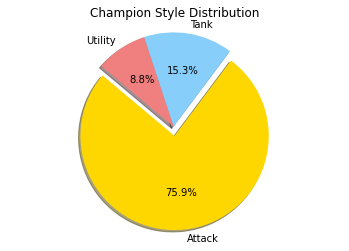

In [6]:
labels = 'Attack', 'Tank', 'Utility'
sizes = [attack_count, tank_count, utility_count]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0)  # explode the 1st slice (Attack)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Champion Style Distribution')
plt.show()

In [7]:
mid_count = 0 
top_count = 0
adc_count = 0 
support_count = 0 
jungler_count = 0 

for lane in Champion_style.values():
    if lane[1] == "mid_laner":
        mid_count += 1
    if lane[1] == "top_laner":
        top_count +=1
    if lane[1] == "adc":
        adc_count +=1
    if lane[1] == "support":
        support_count +=1
    if lane[1] == "jungler":
        jungler_count +=1
    

print(f'There are {mid_count} champions categorized as "Mid Laner".')
print(f'There are {top_count} champions categorized as "Top Laner".')
print(f'There are {adc_count} champions categorized as "ADC Carry".')
print(f'There are {support_count} champions categorized as "Support".')
print(f'There are {jungler_count} champions categorized as "Jungler".')

There are 44 champions categorized as "Mid Laner".
There are 42 champions categorized as "Top Laner".
There are 26 champions categorized as "ADC Carry".
There are 25 champions categorized as "Support".
There are 32 champions categorized as "Jungler".


Text(0.5, 1.0, 'Champion Lane Distribution')

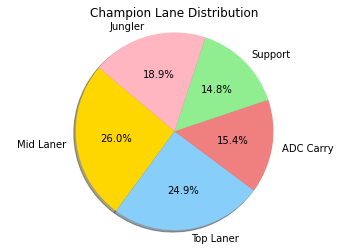

In [8]:
# Assuming you have calculated mid_count, top_count, adc_count, support_count, jungler_count based on the first style
labels = 'Mid Laner', 'Top Laner', 'ADC Carry', "Support", "Jungler"
sizes = [mid_count, top_count, adc_count, support_count, jungler_count]
colors = ['gold', 'lightskyblue', 'lightcoral', "lightgreen", "lightpink"]
#explode = (0.1, 0.1, 0.1, 0.1, 0.1)  # explode the 1st slice (Mid Laner)

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Champion Lane Distribution")

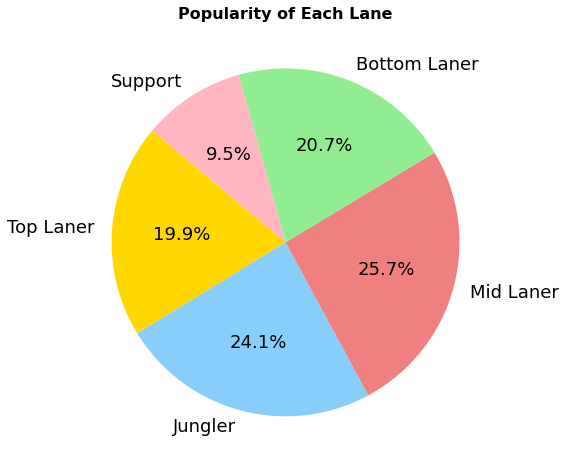

In [9]:
# Combine all tables into a single dataframe by summing them up
combined_table = pd.concat(contingency_tables).groupby(level=0).sum()

# Now, to get the popularity of each lane, sum up the values across the 'Style' axis (rows)
lane_popularity = combined_table.sum(axis=0)

# Print out the popularity of each lane
# print(lane_popularity)

# Data
lanes = ['Top Laner', 'Jungler', 'Mid Laner', 'Bottom Laner', 'Support']
colors = ['gold', 'lightskyblue', 'lightcoral', 'lightgreen', 'lightpink']
popularity = [324, 383, 406, 357, 165]

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(lane_popularity, labels=lanes, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 18})
plt.title('Popularity of Each Lane', size = 16, fontweight='bold')
plt.show()

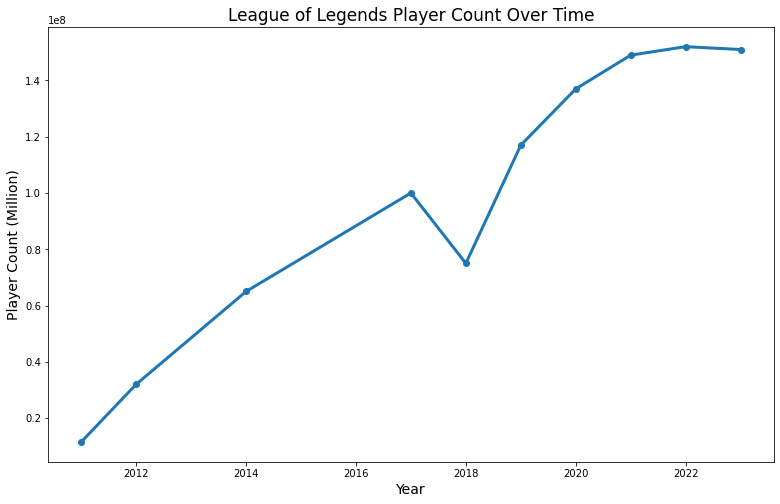

In [10]:
years = sorted_player_count_dict.keys()
player_counts = sorted_player_count_dict.values()

# Plot the data
plt.figure(figsize=(13,8))
plt.plot(years, player_counts, marker='o', linestyle='-', linewidth=3)


plt.xlabel('Year', fontsize=14)
plt.ylabel('Player Count (Million)', fontsize=14)
plt.title('League of Legends Player Count Over Time', fontsize=17)

#plt.grid(True)

# Display the graph
plt.show()

In [11]:
# List of region names corresponding to the tables
region_names = ['Brazil', 'Europe North & East', 'Europe West', 'Japan', 'Korea', 'Latin America North', 'Latin America South', 'North America', 'Oceania', 'Philippines', 'Russia', 'Singapore', 'Thailand', 'Turkey', 'Taiwan', 'Vietnam', 'Pro']

# Two dropdown widgets for selecting the regions
dropdown1 = widgets.Dropdown(options=region_names, value='Brazil', description='Region 1:')
dropdown2 = widgets.Dropdown(options=region_names, value='Europe West', description='Region 2:')

# Define colors for each style
style_colors = {
    'Attack': '#FF6347',  # Tomato color for "Attack"
    'Tank': '#20B2AA',    # LightSeaGreen for "Tank"
    'Utility': '#6495ED'  # CornflowerBlue for "Utility"
}

def plot_tables(region_name1, region_name2):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # Set up a figure with two subplots side by side

    regions = [region_name1, region_name2]

    for i, region_name in enumerate(regions):
        # Find the index of the selected region
        index = region_names.index(region_name)
        # Select the corresponding table
        table = contingency_tables[index]

        bottom = np.zeros(len(table.columns))

        for style, counts in table.iterrows():
            color = style_colors.get(style, 'grey')  # Use 'grey' as default color if style not found in style_colors
            axs[i].bar(table.columns, counts, bottom=bottom, color=color, label=style)
            bottom += counts

        axs[i].set_xlabel('Role')
        axs[i].set_ylabel('Count')
        axs[i].set_title(f'Count of Styles by Role in {region_name}')
        axs[i].legend()
        axs[i].set_yticks([0,5,10,15,20,25,30,35])

    plt.tight_layout()
    plt.show()

# Using widgets.interactive to display both dropdowns and the plot function
widgets.interactive(plot_tables, region_name1=dropdown1, region_name2=dropdown2)

interactive(children=(Dropdown(description='Region 1:', options=('Brazil', 'Europe North & East', 'Europe West…

In [12]:
# Normalize data for 100% stacked bar chart as before
normalized_tables = [table.div(table.sum(axis=0), axis=1) for table in contingency_tables]

# Colors for each 'Style'
style_colors = {
    'Attack': '#FF6347',  # Tomato color for "Attack"
    'Tank': '#20B2AA',    # LightSeaGreen for "Tank"
    'Utility': '#6495ED'  # CornflowerBlue for "Utility"
}

# Lanes for selection in the dropdown
lanes = ['top_laner', 'jungler', 'mid_laner', 'adc', 'support']

# Dropdown widget for selecting the Lane
dropdown = widgets.Dropdown(options=lanes, value='top_laner', description='Lane:')

# Interactive plotting function
def plot_lane(lane):
    fig, ax = plt.subplots(figsize=(10, 8))
    bottom = np.zeros(len(region_names))

    for style in ['Attack', 'Tank', 'Utility']:
        values = [table[lane][style] if lane in table else 0 for table in normalized_tables]
        ax.barh(region_names, values, left=bottom, color=style_colors[style], label=style, edgecolor='white')
        bottom += np.array(values)

    ax.set_xlabel('Percentage')
    ax.set_title(f'Distribution of Styles in {lane.capitalize()} Lane')
    plt.legend(title='Style', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Bind the plot_lane function to the dropdown widget
widgets.interact(plot_lane, lane=dropdown)

interactive(children=(Dropdown(description='Lane:', options=('top_laner', 'jungler', 'mid_laner', 'adc', 'supp…

<function __main__.plot_lane(lane)>

In [13]:
# Initialize an empty DataFrame for the results
support_players_summary = pd.DataFrame()

# Iterate over each DataFrame in your list
for df in dataframes_list:
    # Filter for 'support' players
    supports = df[df['Lane'] == 'support']
    
    # Append these players to the summary DataFrame
    support_players_summary = pd.concat([support_players_summary, supports], ignore_index=True)

# Now, `support_players_summary` contains all 'support' players across your DataFrames

# If you need to further process or categorize this data, you can do so by manipulating this DataFrame.
# For example, counting players by 'Style' and 'Main Champion':
style_champion_count = support_players_summary.groupby(['Style', 'Main Champion']).size().reset_index(name='Count')

all_support_rows = pd.DataFrame()

for df in dataframes_list:
    support_rows = df[df["Lane"] == 'support']

# Append the filtered rows
    all_support_rows = pd.concat([all_support_rows, support_rows], ignore_index=True)

#all_support_rows

support_counts_by_style = { 'Attack': {}, 'Tank': {}, 'Utility': {}}

for style in support_counts_by_style.keys():
    filtered_df = all_support_rows[all_support_rows['Style'] == style]


    champion_counts = filtered_df['Main Champion'].value_counts().to_dict()


    #support_counts_by_style[style] = champion_counts
    sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)
    support_counts_by_style[style] = sorted_champions[0:3]
    #print(champion_counts_by_style[style])
    
# support_counts_by_style
all_top_laner_rows = pd.DataFrame()

for df in dataframes_list:
    top_laner_rows = df[df["Lane"] == 'top_laner']

# Append the filtered rows
    all_top_laner_rows = pd.concat([all_top_laner_rows, top_laner_rows], ignore_index=True)

#all_top_laner_rows

top_counts_by_style = { 'Attack': {}, 'Tank': {}, 'Utility': {}}

for style in top_counts_by_style.keys():
    filtered_df = all_top_laner_rows[all_top_laner_rows['Style'] == style]


    champion_counts = filtered_df['Main Champion'].value_counts().to_dict()

    sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)
    top_counts_by_style[style] = sorted_champions[0:3]
# top_counts_by_style

all_mid_laner_rows = pd.DataFrame()

for df in dataframes_list:
    mid_laner_rows = df[df["Lane"] == 'mid_laner']

# Append the filtered rows
    all_mid_laner_rows = pd.concat([all_mid_laner_rows, mid_laner_rows], ignore_index=True)

#all_mid_laner_rows

mid_counts_by_style = { 'Attack': {}, 'Tank': {}, 'Utility': {}}

for style in mid_counts_by_style.keys():
    filtered_df = all_mid_laner_rows[all_mid_laner_rows['Style'] == style]


    champion_counts = filtered_df['Main Champion'].value_counts().to_dict()

    sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)
    mid_counts_by_style[style] = sorted_champions[0:3]



# mid_counts_by_style

all_jungler_rows = pd.DataFrame()

for df in dataframes_list:
    jungler_rows = df[df["Lane"] == 'jungler']

    # Append the filtered rows
    all_jungler_rows = pd.concat([all_jungler_rows, jungler_rows], ignore_index=True)

#all_jungler_rows

jungler_counts_by_style = { 'Attack': {}, 'Tank': {}, 'Utility': {}}

for style in top_counts_by_style.keys():
    filtered_df = all_jungler_rows[all_jungler_rows['Style'] == style]


    champion_counts = filtered_df['Main Champion'].value_counts().to_dict()


    sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)
    jungler_counts_by_style[style] = sorted_champions[0:3]


# jungler_counts_by_style

all_adc_rows = pd.DataFrame()

for df in dataframes_list:
    adc_rows = df[df["Lane"] == 'adc']

    # Append the filtered rows
    all_adc_rows = pd.concat([all_adc_rows, adc_rows], ignore_index=True)

#all_adc_rows

adc_counts_by_style = { 'Attack': {}, 'Tank': {}, 'Utility': {}}

for style in adc_counts_by_style.keys():
    filtered_df = all_adc_rows[all_adc_rows['Style'] == style]


    champion_counts = filtered_df['Main Champion'].value_counts().to_dict()


    sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)
    adc_counts_by_style[style] = sorted_champions[0:3]


# adc_counts_by_style

all_role_champion = [support_counts_by_style, jungler_counts_by_style, adc_counts_by_style, mid_counts_by_style, top_counts_by_style]

# Define the roles corresponding to each index in all_role_champion
roles = ['Support', 'Jungler', 'ADC', 'Mid', 'Top']

# Add the 'role' key to each dictionary in all_role_champion
for i, role_champion in enumerate(all_role_champion):
    role_champion['role'] = roles[i]

# all_role_champion

# Add the 'role' key to each dictionary in all_role_champion
for role_champion in all_role_champion:
    #print(role_champion)
    for style in list(role_champion.keys()):
        if not role_champion[style]:
            del role_champion[style]

# all_role_champion

all_role_champion = pd.DataFrame(all_role_champion)


# Assuming 'dataframes_list' is a list of DataFrames with relevant data

def aggregate_data_by_role_and_style(role, dataframes_list):
    all_rows = pd.DataFrame()
    for df in dataframes_list:
        role_rows = df[df["Lane"] == role]
        all_rows = pd.concat([all_rows, role_rows], ignore_index=True)
    print(f"Aggregated Data for {role}: {all_rows.shape}")  # Debugging info
    return all_rows

def get_top_champions_by_style(all_rows, complete_styles):
    counts_by_style = {}
    for style in complete_styles:
        if style in all_ros['Style'].unique():
            filtered_df = all_rows[all_rows['Style'] == style]
            print(f"Data for {style} Style: {filtered_df.shape}")  # Debugging info
            champion_counts = filtered_df['Main Champion'].value_counts().to_dict()
            sorted_champions = sorted(champion_counts.items(), key=lambda x: x[1], reverse=True)
            counts_by_style[style] = sorted_champions[:3]
        else:
            print(f"No champions found for style: {style}")  # Debugging info
    return counts_by_style

# Function to create an interactive plot
def create_interactive_plot(role, style):
    filtered_data = all_role_champion[all_role_champion['role'] == role]

    if style in filtered_data.columns:
        top_champions = filtered_data[style].iloc[0]

        # Check if there are top champions and that the list is not empty
        if top_champions and isinstance(top_champions, list) and len(top_champions) > 0:
            top_champions_df = pd.DataFrame(top_champions, columns=['Champion', 'Count'])
            # Plot
            fig = px.bar(top_champions_df, x='Champion', y='Count', title=f'Top Champions for {style} in {role}')
            fig.show()
        else:
            # Print the message instead of attempting to plot
            print(f"There are no champions for the {style} style in the {role} role.")



# Widget setup for interactive visualization
roles = ['Support', 'Jungler', 'ADC', 'Mid', 'Top']
styles = ['Attack', 'Tank', 'Utility']

role_dropdown = widgets.Dropdown(options=roles, description='Role:')
style_dropdown = widgets.Dropdown(options=styles, description='Style:')

widgets.interactive(create_interactive_plot, role=role_dropdown, style=style_dropdown)

interactive(children=(Dropdown(description='Role:', options=('Support', 'Jungler', 'ADC', 'Mid', 'Top'), value…